In [1]:
import pandas as pd
from scipy import stats
import numpy as np

In [10]:
import platform

print(platform.python_version())

2.7.10


1.Загрузите агрегированные данные о поездках в мае 2016. Просуммируйте общее количество поездок такси из каждой географической зоны и посчитайте количество ячеек, из которых в мае не было совершено ни одной поездки.

In [2]:
dt = pd.read_csv('time_zone_2016_05.csv', sep = ',',header=0)

In [3]:
dt[dt.index==1230]

,Unnamed: 0,2016-05-01 00:00:00,2016-05-01 01:00:00,2016-05-01 02:00:00,2016-05-01 03:00:00,2016-05-01 04:00:00,2016-05-01 05:00:00,2016-05-01 06:00:00,2016-05-01 07:00:00,2016-05-01 08:00:00,...,2016-05-31 14:00:00,2016-05-31 15:00:00,2016-05-31 16:00:00,2016-05-31 17:00:00,2016-05-31 18:00:00,2016-05-31 19:00:00,2016-05-31 20:00:00,2016-05-31 21:00:00,2016-05-31 22:00:00,2016-05-31 23:00:00
1230,1231,1143.0,1005.0,810.0,662.0,512.0,230.0,190.0,265.0,328.0,...,759.0,795.0,687.0,900.0,1321.0,1092.0,1170.0,1438.0,1365.0,925.0


In [4]:
dt['my_sum'] = dt.drop('Unnamed: 0',1).sum(axis=1)

In [5]:
len(dt[dt['my_sum']==0])#количество ячеек, из которых в мае не было совершено ни одной поездки.

1283

2.Нарисуйте статическую карту Нью-Йорка. Поставьте на карте точку там, где находится Эмпайр-Стейт-Билдинг.

Нью-Йорк вписан в прямоугольник от -74.25559 до -73.70001 градусов долготы и от 40.49612 до 40.91553 широты

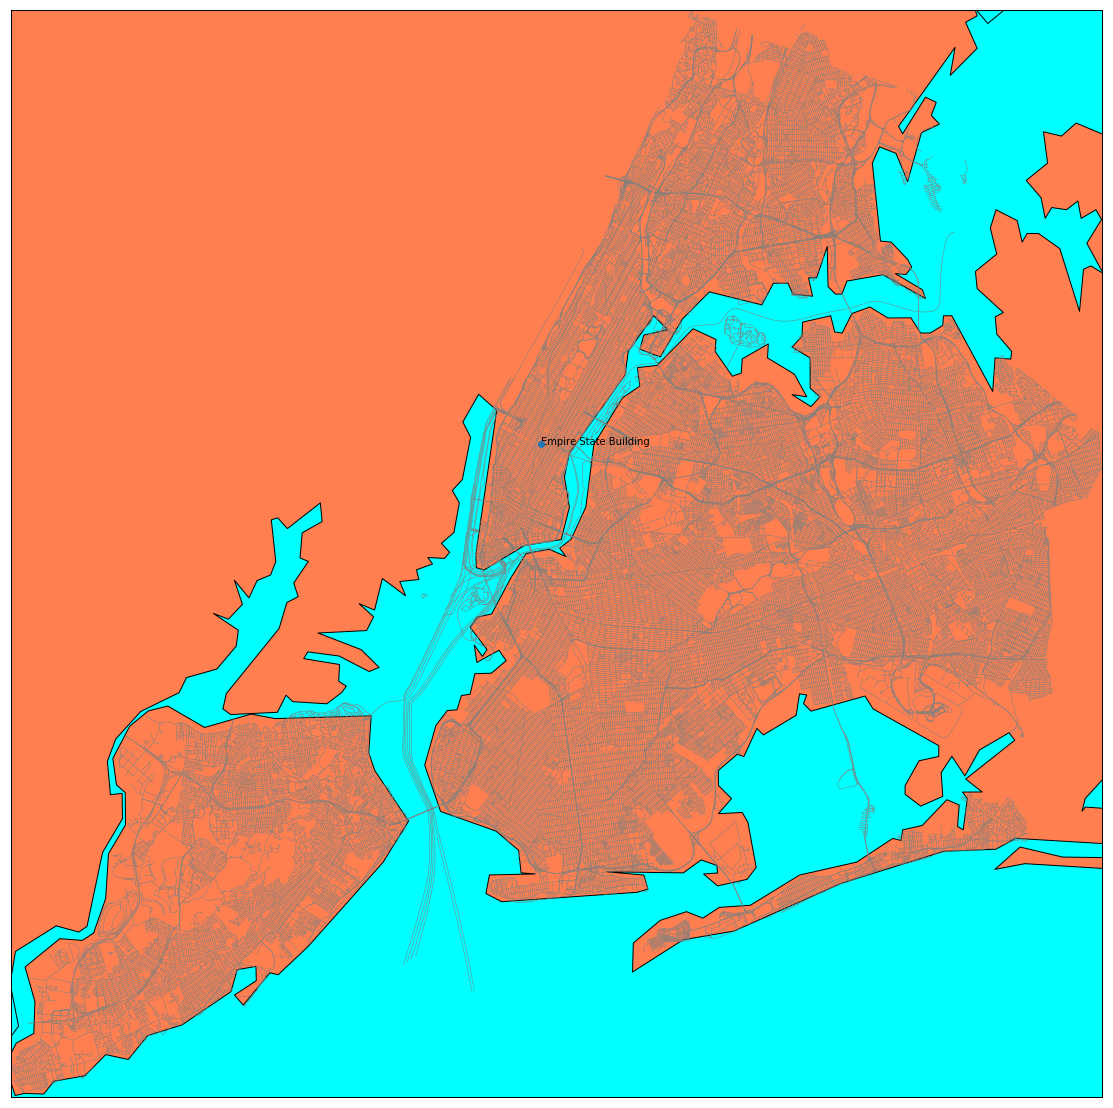

In [145]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# setup Lambert Conformal basemap.
west, south, east, north = -74.25559, 40.49612, -73.70001, 40.91553
fig = plt.figure(figsize=(20,20))
#ax = fig.add_subplot(111)

im = plt.imread('New_York_center.png')
extent = [-74.25559, -73.70001,40.49612, 40.91553] # [left, right, bottom, top]

m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='h')


m.drawcoastlines()
m.drawmapboundary(fill_color='aqua')

# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua',zorder=0)

x,y=-73.98591,40.74846
x,y = m(x,y)
m.scatter(x,y,zorder=10)
plt.annotate('Empire State Building', xy=(x, y))

#можно импортировать карту ввиде изображения и прикрепить его по координатам.
#m.imshow(im, extent=extent, alpha=0.6,origin="upper")
#m.drawstates(color='gray')

#открываем файл с дорогами НьюЙорка
m.readshapefile("/Python27/NY",'NY',color='gray')

plt.show()

3.Поверх статической карты Нью-Йорка визуализируйте данные о поездках из каждой ячейки так, чтобы цветовая шкала, в которую вы окрашиваете каждую ячейку, показывала суммарное количество поездок такси из неё.

In [6]:
regions = pd.read_csv('regions.txt',sep=';',header=0)

In [7]:
regions['summ']=dt.my_sum.values

In [8]:
regions[regions.summ>600000] #возьмем ячейку дял проверки правильность построения карты

,region,west,east,south,north,summ
1280,1281,-73.9778,-73.966688,40.747766,40.756154,638799.0


In [9]:
regions.head()

,region,west,east,south,north,summ
0,1,-74.25559,-74.244478,40.496120,40.504508,0.0
1,2,-74.25559,-74.244478,40.504508,40.512896,0.0
2,3,-74.25559,-74.244478,40.512896,40.521285,0.0
3,4,-74.25559,-74.244478,40.521285,40.529673,0.0
4,5,-74.25559,-74.244478,40.529673,40.538061,0.0


In [17]:
s=np.roll(regions.south.values,-1)
s[:-1]
shag=s-regions.south.values
shag
print (regions.south.values.max(),shag)

(40.907141799999998, array([ 0.0083882,  0.0083882,  0.0083882, ...,  0.0083882,  0.0083882,
       -0.4110218]))


In [18]:
un=np.unique(regions.west.values)
minus=np.roll(un,-1)

In [143]:
un-minus

array([-0.0111116, -0.0111116, -0.0111116, -0.0111116, -0.0111116,
       -0.0111116, -0.0111116, -0.0111116, -0.0111116, -0.0111116,
       -0.0111116, -0.0111116, -0.0111116, -0.0111116, -0.0111116,
       -0.0111116, -0.0111116, -0.0111116, -0.0111116, -0.0111116,
       -0.0111116, -0.0111116, -0.0111116, -0.0111116, -0.0111116,
       -0.0111116, -0.0111116, -0.0111116, -0.0111116, -0.0111116,
       -0.0111116, -0.0111116, -0.0111116, -0.0111116, -0.0111116,
       -0.0111116, -0.0111116, -0.0111116, -0.0111116, -0.0111116,
       -0.0111116, -0.0111116, -0.0111116, -0.0111116, -0.0111116,
       -0.0111116, -0.0111116, -0.0111116, -0.0111116,  0.5444684])

In [21]:
c = [1,2,3,4,5,6,7,8,9]
c.reverse
k=np.reshape(c,(3, 3)).T
k[::-1]

array([[3, 6, 9],
       [2, 5, 8],
       [1, 4, 7]])

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 5.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


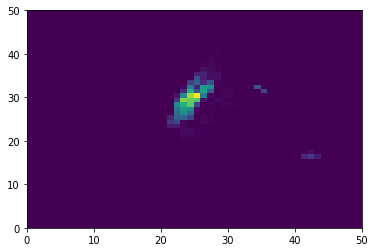

In [22]:
# Мы можем сами построить своими руками растр количества поездок из зон

z = regions['summ'].values.reshape(-1).tolist()
k=np.reshape(z,(50, 50))
print (k.T)

p=plt.pcolormesh(k.T)
fig.colorbar(p)
plt.show()
fig.savefig('grid1.png')

In [199]:
# сами строим своими руками растр среднего количества поездок из зон в час
fig1 = plt.figure(figsize=(20,20))
regions['per_hour']=regions['summ']/744
z1 = regions['per_hour'].values.reshape(-1).tolist()
k1=np.reshape(z1,(50, 50))
print (k1.T)
p1=plt.pcolormesh(k1.T)
fig1.colorbar(p1)

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.00672043  0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


In [24]:
regions[regions.per_hour>5].count()#Количество ячеек, в которых больше 5 поездок в час

region      102
west        102
east        102
south       102
north       102
summ        102
per_hour    102
dtype: int64

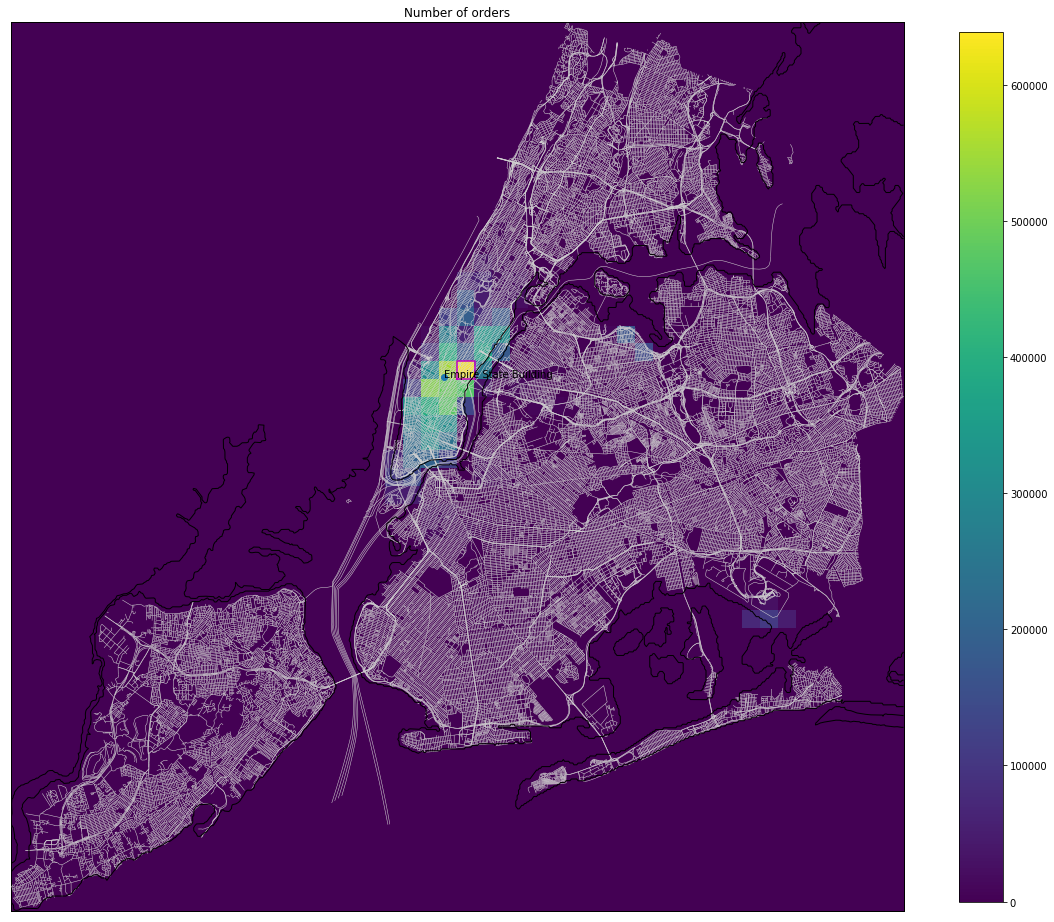

In [28]:
from mpl_toolkits.basemap import Basemap, shiftgrid, maskoceans, interp

import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east,  resolution='f',o_lon_p=180)
west, south, east, north = -74.25559, 40.49612, -73.70001, 40.91553
fig = plt.figure(figsize=(20,20))
x = np.array(regions.west.values)
y = np.array(regions.south.values)
z = np.array(regions.summ.values)

# transform coordinates to map projection m
m_lon, m_lat = m(*(x, y))


# Create coordinate pairs
cartcoord = list(zip(x, y))

# draw map details
m.drawmapboundary(fill_color = 'skyblue', zorder = 1)

X = np.linspace(min(x), max(x)+0.0111116,51)
Y = np.linspace(min(y), max(y)+0.0083882,51)
X, Y = np.meshgrid(X, Y)

interp = scipy.interpolate.LinearNDInterpolator(cartcoord, z, fill_value=0)
Z0 = interp(X, Y)

#создаем растр кличества поездок
m.pcolormesh(X, Y, Z0,latlon=True)
plt.colorbar(extendfrac='auto',shrink=0.8) # Color Bar

#рисуем ячейку 1281 
lons = [-73.9778, -73.9778,-73.966688,-73.966688,-73.9778]
lats = [40.747766, 40.756154, 40.756154,40.747766,40.747766]

x1281, y1281 = m(lons, lats)

m.plot(x1281, y1281, marker=None,color='m')


#рисуем точку здания
x1,y1=-73.98591,40.74846
x2,y3 = m(x1,y1)
m.scatter(x2,y3,zorder=3)
plt.annotate('Empire State Building', xy=(x2, y3),zorder=4)
m.drawcoastlines(zorder=5)
plt.title('Number of orders')

#открываем файл с дорогами НьюЙорка
m.readshapefile("/Python27/NY",'NY',color='lightgray')
plt.show()

4 Вставьте интерактивную карту Нью-Йорка — такую, которую можно прокручивать и увеличивать. Поставьте метку там, где находится статуя свободы.


5 Нарисуйте на интерактивной карте Нью-Йорка ячейки так, чтобы их цвет показывал среднее за месяц количество поездок такси в час из этой зоны.

In [15]:
import folium

In [193]:
from folium import plugins
import matplotlib as mpl
import branca.colormap as cm

map_osm = folium.Map(location=[40.74846, -73.98591])

#Статуя свободы
feature_group = folium.FeatureGroup(name='Layer1')
folium.Marker([40.6873,-74.0307]).add_to(feature_group)

#растр по среднему количеству поездок в час из зоны
data = k1.T

# Один из вариантов реализации. Минус в том, что я не смогла в этом варианте вставить colorbar.

colormap = cm.linear.Set1.scale(0, 35).to_step(10)
colormap.caption = 'A colormap caption'

io = plugins.ImageOverlay(data, [[40.49612, -74.25559], [40.91553, -73.70001]],origin='lower',opacity=0.5,crossOrigin=True,colormap=plt.cm.Oranges)
io.add_to(feature_group)
map_osm.add_child(feature_group)
map_osm.add_child(colormap)
map_osm.add_child(folium.LayerControl())
map_osm

In [ ]:
map_osm.save('map_via_follium.html')

In [77]:
len(regions)

2500

6 Чтобы не выбирать из всех 2500 ячеек вручную, отфильтруйте ячейки, из которых в мае совершается в среднем меньше 5 поездок в час. Посчитайте количество оставшихся. Проверьте на карте, что среди этих ячеек нет таких, из которых поездки на самом деле невозможны.

In [26]:
# посмотрим на те ячейки со значением больше 5(выделены черным)
from folium import plugins 
map_osm = folium.Map(location=[40.74846, -73.98591])

#Статуя свободы
folium.Marker([40.6873,-74.0307]).add_to(map_osm )

#растр по среднему количеству поездок в час из зоны
data = k1.T

# Один из вариантов-включить сразу в слой условие ,получается подобие маски. 
#Если проверить на глазок, то ячейки, которые залезают на часть c водой имеют так же часть с сушей. 
io = plugins.ImageOverlay(data<5, [[40.49612, -74.25559], [40.91553, -73.70001]],origin='lower',opacity=0.5)
io.add_to(map_osm)


map_osm

Вывод:
    Если проверить на глазок, то ячейки, которые залезают на часть c водой имеют так же часть с сушей.
    Условие нахождения ячеек на суше лучше, конечно, проверить аналитически.

Один из вариантов создания слоя со средним количеством поездок-это с помощью geopandas. Это решение хорошее, когда в наборе не много объектов. Набор на 7 млн. объектов будет обрабатываться долго, так как они перебираются строка за строкой.
Но для гуманитария с небольшим набором данных, это очень удобный пакет.

In [107]:
from shapely.geometry import mapping, Polygon
import pandas as pd
import geopandas as gpd

west=regions.west.values
south=regions.south.values
east=regions.east.values
north=regions.north.values

geo_regions = gpd.GeoDataFrame()#делаем таблицу с geopandas
geo_regions['geometry'] = None#новый столбец с полигонами
geo_regions['orders_per_hour'] = None

list_of_poly=[]#Создаем и добавляем по одному полигону в таблицу
for i in range(0,2500):
    poly=Polygon([(west[i], south[i]), (east[i], south[i]), (east[i], north[i]), (west[i], north[i])])
    geo_regions.loc[i, 'geometry'] = poly
    geo_regions.loc[i,'orders_per_hour']=regions.summ[i]/744


In [108]:
print(geo_regions.crs)#определяем систему координат нашей новой таблицы

None


In [109]:
from fiona.crs import from_epsg
# Set the GeoDataFrame's coordinate system to WGS84
geo_regions.crs = from_epsg(4326)
geo_regions.crs

{'init': 'epsg:4326', 'no_defs': True}

In [110]:
# Determine the output path for the Shapefile
outgeo_regions = r"C:/Users/lena/Desktop/new_6course/predicting/geo_regions.shp"

# Write the data into that Shapefile
geo_regions.to_file(outgeo_regions)

In [111]:
data1 = gpd.read_file("C:/Users/lena/Desktop/new_6course/predicting/geo_regions.shp")
data1.plot()

In [113]:
import json
import ogr

driver = ogr.GetDriverByName('ESRI Shapefile')#запаковываем файлв формат json
shp_path = r'C:\Users\lena\Desktop\new_6course\predicting\geo_regions.shp'
data_source = driver.Open(shp_path, 0)

fc = {
    'type': 'FeatureCollection',
    'features': []
    }

lyr = data_source.GetLayer(0)
for feature in lyr:    
    fc['features'].append(feature.ExportToJson(as_object=True))

with open('geo_region1.json', 'wb') as f:
    json.dump(fc, f)

In [136]:
data1.orders_per.max()

u'95.05645161290323'

In [187]:
osm = folium.Map([40.74846, -73.98591], zoom_start=10)

osm.choropleth(
    geo_data = open('geo_region1.json').read(),
    data=regions['per_hour'],
    key_on = 'feature.id',
    fill_color = 'PuRd',
    fill_opacity=0.6,
    line_opacity=0,
    threshold_scale=[0, 20, 40, 60, 80, 100],
    legend_name='Clients per hour, may 2016')
osm

In [147]:
osm.save('Clients_per_hour_may_2016.html')

In [167]:
# Determine the output path for the Shapefile
outgeo_regions5 = r"C:/Users/lena/Desktop/new_6course/predicting/geo_regions_more_than_5.shp"

geo_regions[geo_regions.orders_per_hour>5].to_file(outgeo_regions5)
geo_regions[geo_regions.orders_per_hour>5].orders_per_hour

1073    66.7997
1074    138.266
1075    86.8024
1123    66.0417
1124    181.892
1125    267.102
1126     295.37
1127    339.087
1128    420.629
1129     144.29
1130    44.5484
1170    6.60484
1171    22.3454
1172    25.6304
1173    11.1828
1174    20.1761
1175    269.141
1176    417.409
1177    471.203
1178    538.257
1179    698.418
1180    405.708
1181    101.961
1182    19.2097
1219    5.04301
1220    9.99462
1221    16.5578
1222     25.504
1223    5.36425
1225    162.093
         ...   
1386    21.1882
1387    13.9624
1388    14.9812
1424    5.49866
1429    17.6815
1432    9.56048
1433    8.57527
1434    30.6237
1435    30.0296
1436    10.9812
1437    7.21505
1439    5.08199
1440    7.05914
1478    10.4328
1480    11.0605
1481    10.9113
1528    12.1398
1530    7.12097
1531    9.88978
1578    5.46102
1628    5.15995
1682    12.7137
1731     5.4207
1732    214.841
1781    186.399
2066    95.0565
2067    10.5457
2116    146.491
2117    34.6922
2166    68.5323
Name: orders_per_hour, L

In [168]:
driver = ogr.GetDriverByName('ESRI Shapefile')#запаковываем файл в формат json
shp_path = r'C:\Users\lena\Desktop\new_6course\predicting\geo_regions_more_than_5.shp'
data_source = driver.Open(shp_path, 0)

fc = {
    'type': 'FeatureCollection',
    'features': []
    }

lyr = data_source.GetLayer(0)
for feature in lyr:    
    fc['features'].append(feature.ExportToJson(as_object=True))

with open('geo_regions_more_than_5.json', 'wb') as f:
    json.dump(fc, f)

In [172]:
osm = folium.Map([40.74846, -73.98591], zoom_start=10)

osm.choropleth(
    geo_data = open('geo_regions_more_than_5.json').read(),
    key_on = 'feature.id',
    fill_color = 'PuRd',
    fill_opacity=0.7,
    line_opacity=0)
osm